### Jupyter Notebook для первой лекции, где мы рассмотрим данные ATLAS Open Data, их структуру и базовые операции с ними. В ноутбуке будет:

1. Чтение ROOT файлов с помощью uproot
2. Просмотр структуры данных
3. Вывод первых строк для ознакомления
4. Базовая визуализация

### First time setup on your computer
This first cell only needs to be run the first time you open this notebook on your computer.
If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.

In [ ]:
import yaml
import subprocess
import sys

# Path to your binder/environment.yml file
environment_file = "environment.yml"

# Packages you want to install
required_packages = ['pandas', 'numpy', 'uproot3', 'numpy', 'matplotlib']

# Load the environment.yml file
with open(environment_file, 'r') as file:
    environment_data = yaml.safe_load(file)

# Extract dependencies
dependencies = environment_data.get('dependencies', [])

# Create a list to hold the packages with versions
install_packages = []

# Find the versions for the required packages
for dep in dependencies:
    # Check if the dependency is a string (package name)
    if isinstance(dep, str):
        for package in required_packages:
            if dep.startswith(package):
                install_packages.append(dep)

# Install packages using pip
if install_packages:
    print(f"Installing packages: {install_packages}")
    subprocess.run([sys.executable, "-m", "pip", "install", "--upgrade", "--user"] + install_packages)
else:
    print("No matching packages found in environment.yml.")

## To setup everytime

In [3]:
import urllib.request # for downloading files
import pandas as pd # to store data as dataframes
import numpy as np # for numerical calculations such as histogramming
import uproot # to read .root files as dataframes
import matplotlib.pyplot as plt # for plotting
import awkward as ak

## Где находятся данные?

В эксперименте ATLAS данные разбиты на несколько файлов в зависимости от **накопленной светимости (luminosity)**. Светимость измеряется в **фемтобарнах (fb⁻¹)** и определяет количество собранных событий за определённый период работы детектора. Чем выше светимость, тем больше данных было записано.

Файлы данных:
- `data_A.exactly2lep.root` → **Светимость 0.5 fb⁻¹**
- `data_B.exactly2lep.root` → **Светимость 1.9 fb⁻¹**
- `data_C.exactly2lep.root` → **Светимость 2.9 fb⁻¹**
- `data_D.exactly2lep.root` → **Светимость 4.7 fb⁻¹**
- Объединённые данные `data_A + data_B + data_C + data_D` → **Светимость 10 fb⁻¹**

🔹 **Что это значит?**
Разные файлы содержат данные, записанные в разное время работы детектора ATLAS. Более поздние данные (например, `data_D`) соответствуют более высокой интегральной светимости, то есть они включают больше столкновений, а значит, потенциально больше интересных событий.

In [4]:
filename = 'data_A.exactly2lep.root'
url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/Data/'+filename
urllib.request.urlretrieve(url, filename)

('data_A.exactly2lep.root', <http.client.HTTPMessage at 0x7f5d74212830>)

In [5]:
file = uproot.open(filename)

In [6]:
# Проверяем наличие дерева
tree_name = "mini"  # Имя дерева
if tree_name in file:
    tree = file[tree_name]
    print("List of branches:")
    print(tree.keys())
else:
    print("Error: TTree is not found!")

List of branches:
['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER', 'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav', 'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched', 'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20', 'photon_convType', 'tau_n', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_E', 'tau_isTightID', 'tau_truthMatched', 'tau_trigMatched', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst', 'met_et_syst',

In [8]:
# Определяем бранчи, относящиеся к лептонам
lep_branches = ['lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 
                'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 
                'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased']

# Читаем данные в Pandas DataFrame
df_leptons = tree.arrays(lep_branches)  # Используем Pandas

In [9]:
# Выводим первые строки с переменной lep_pt
print("Branch lep_pt in MeV:")
print(df_leptons['lep_pt'])

Branch lep_pt in MeV:
[[3.31e+04, 2.11e+04], [4.29e+04, 3.72e+04], ..., [...], [1.08e+05, 9.17e+04]]


In [10]:
# Выводим первые строки с переменной lep_pt
print("Branch lep_pt in GeV:")
print(df_leptons['lep_pt']/1000)

Branch lep_pt in GeV:
[[33.1, 21.1], [42.9, 37.2], [33.1, 29.2], ..., [27.6, 13.9], [108, 91.7]]


In [11]:
def plot_distribution(data, column, bins=50, range=None, xlabel=None, ylabel="Number of events", title=None):
    """
    Функция для построения гистограммы заданной переменной из данных.
    
    Parameters:
    - data: DataFrame (Pandas) или Awkward Array
    - column: str, название столбца для построения
    - bins: int, количество бинов в гистограмме
    - range: tuple, диапазон значений (xmin, xmax)
    - xlabel: str, подпись оси X
    - ylabel: str, подпись оси Y (по умолчанию "Number of events")
    - title: str, заголовок графика
    """
    plt.figure(figsize=(8,6))
    
    # Преобразуем в плоский массив, если данные в Awkward Array
    column_data = ak.flatten(data[column]).to_numpy()
    print(column_data)
    
    plt.hist(column_data, bins=bins, range=range, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel(xlabel if xlabel else column)
    plt.ylabel(ylabel)
    plt.title(title if title else f"Distribution of {column}")
    plt.grid()
    plt.show()

[ 33144.9    21067.385  42871.246 ...  13892.836 108435.18   91717.31 ]


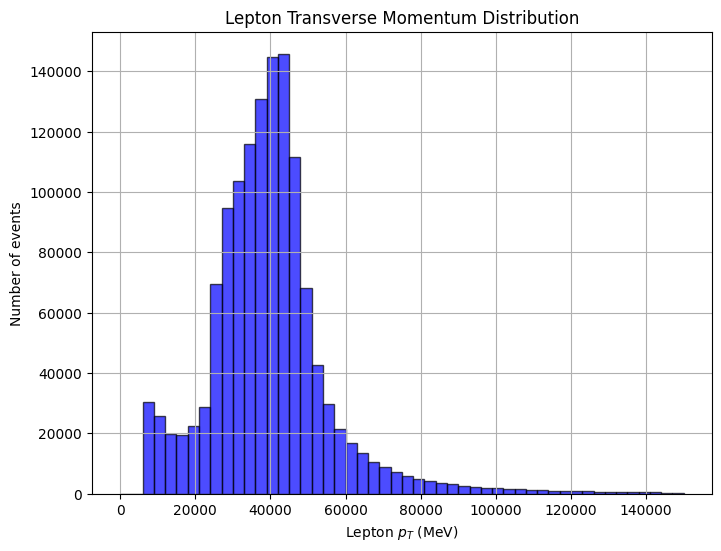

In [12]:
# Строим гистограмму для lep_pt
plot_distribution(df_leptons, 'lep_pt', bins=50, range=(0, 150000), xlabel=r"Lepton $p_T$ (MeV)", title="Lepton Transverse Momentum Distribution")

In [13]:
# Выводим первые строки с переменной lep_eta
print("Branch lep_eta:")
print(df_leptons['lep_eta'])

Branch lep_eta:
[[2.18, -0.139], [0.0671, -0.946], [...], ..., [0.443, 0.0193], [1.93, 1.63]]


[ 2.1760893  -0.13919     0.06711553 ...  0.01933846  1.9323453
  1.6290581 ]


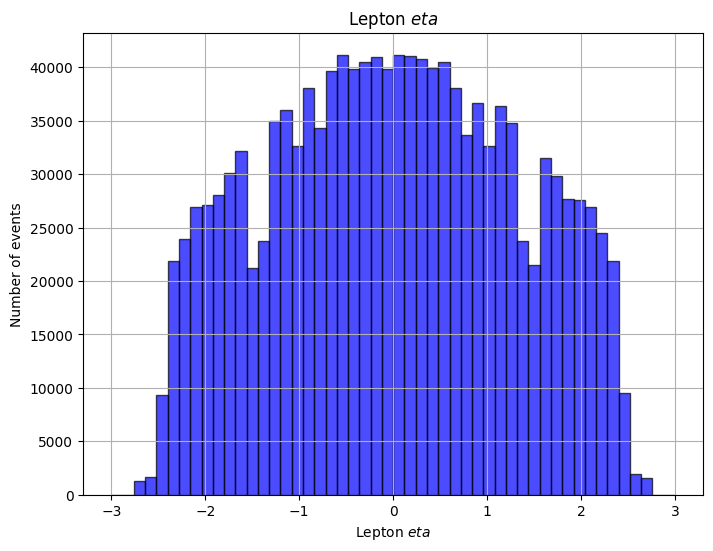

In [14]:
# Строим гистограмму для lep_eta
plot_distribution(df_leptons, 'lep_eta', bins=50, range=(-3, 3), xlabel=r"Lepton $eta$", title="Lepton $eta$")

In [15]:
# Выводим первые строки с переменной lep_eta
print("Branch lep_phi:")
print(df_leptons['lep_phi'])

Branch lep_phi:
[[0.214, -2.67], [-0.133, -2.93], [...], ..., [0.459, 0.68], [-2.73, 0.389]]


[ 0.2142506  -2.6704178  -0.13265307 ...  0.6795905  -2.7335272
  0.38945675]


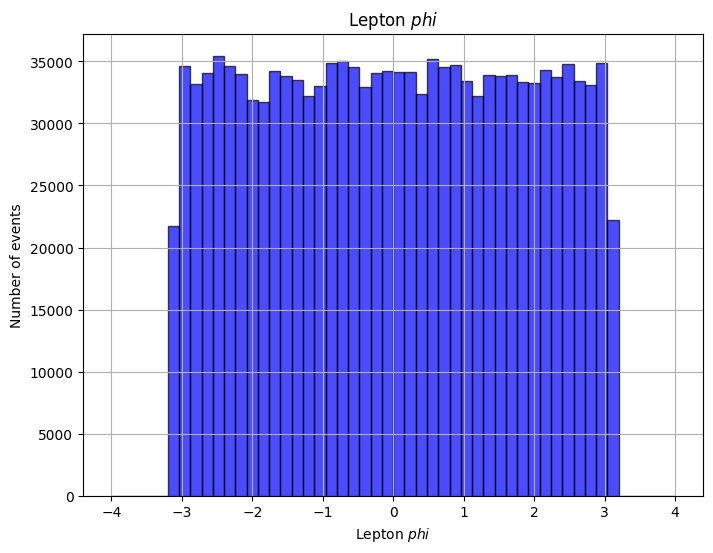

In [16]:
# Строим гистограмму для lep_pt
plot_distribution(df_leptons, 'lep_phi', bins=50, range=(-4, 4), xlabel=r"Lepton $phi$", title="Lepton $phi$")

[-1  1  1 ...  1  1 -1]


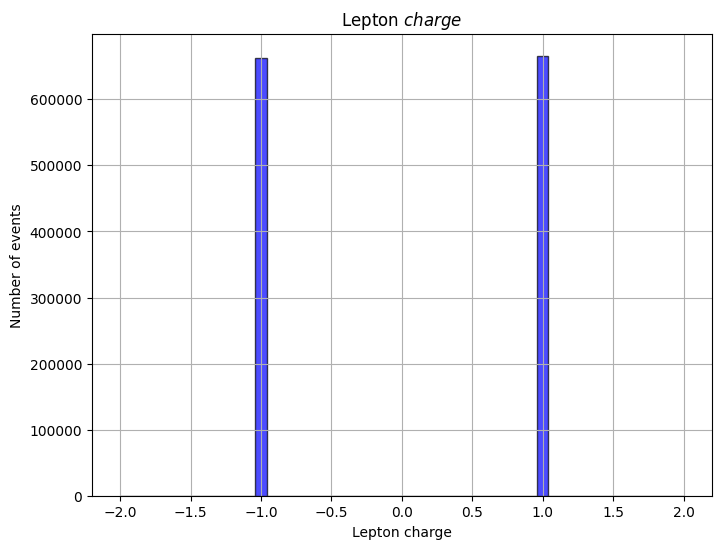

In [17]:
plot_distribution(df_leptons, 'lep_charge', bins=50, range=(-2, 2), xlabel=r"Lepton charge", title="Lepton $charge$")

### А как понять, где мюон, где электрон, а где тау-лептон?

In [18]:
print("Branch lep_type:")
print(df_leptons['lep_type'])

Branch lep_type:
[[11, 11], [11, 11], [11, 11], [11, 11], ..., [13, 13], [13, 13], [13, 13]]


Checking the PDG ID of particles: https://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-numbering.pdf 

[11 11 11 ... 13 13 13]


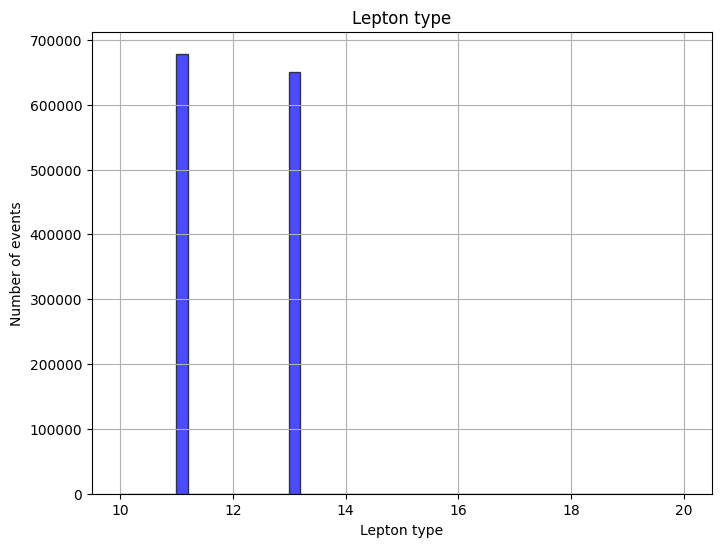

In [19]:
# Строим гистограмму для lep_eta
plot_distribution(df_leptons, 'lep_type', bins=50, range=(10, 20), xlabel=r"Lepton type", title="Lepton type")

In [20]:
# Create masks for electrons and muons
electron_mask = df_leptons['lep_type'] == 11  # 11 corresponds to electrons
muon_mask = df_leptons['lep_type'] == 13  # 13 corresponds to muons

In [21]:
# Apply the mask and flatten the arrays
electron_pt = ak.flatten(df_leptons['lep_pt'][electron_mask]).to_numpy()
muon_pt = ak.flatten(df_leptons['lep_pt'][muon_mask]).to_numpy()

In [22]:
# Convert MeV to GeV if necessary
electron_pt = electron_pt / 1000 if np.median(electron_pt) > 1000 else electron_pt
muon_pt = muon_pt / 1000 if np.median(muon_pt) > 1000 else muon_pt

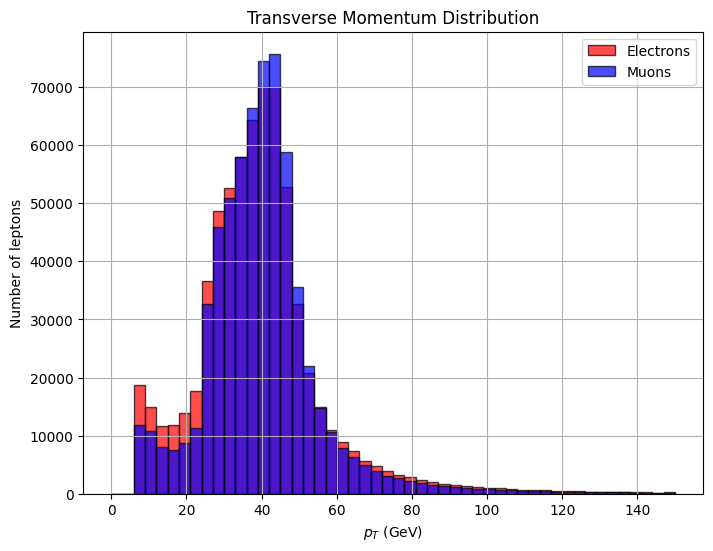

In [23]:
# Plot both distributions
plt.figure(figsize=(8,6))
plt.hist(electron_pt, bins=50, range=(0, 150), alpha=0.7, color='red', edgecolor='black', label='Electrons')
plt.hist(muon_pt, bins=50, range=(0, 150), alpha=0.7, color='blue', edgecolor='black', label='Muons')

plt.xlabel(r"$p_T$ (GeV)")
plt.ylabel("Number of leptons")
plt.title("Transverse Momentum Distribution")
plt.legend()
plt.grid()
plt.show()

In [24]:
# Apply the mask and flatten the arrays
electron_eta = ak.flatten(df_leptons['lep_eta'][electron_mask]).to_numpy()
muon_eta = ak.flatten(df_leptons['lep_eta'][muon_mask]).to_numpy()

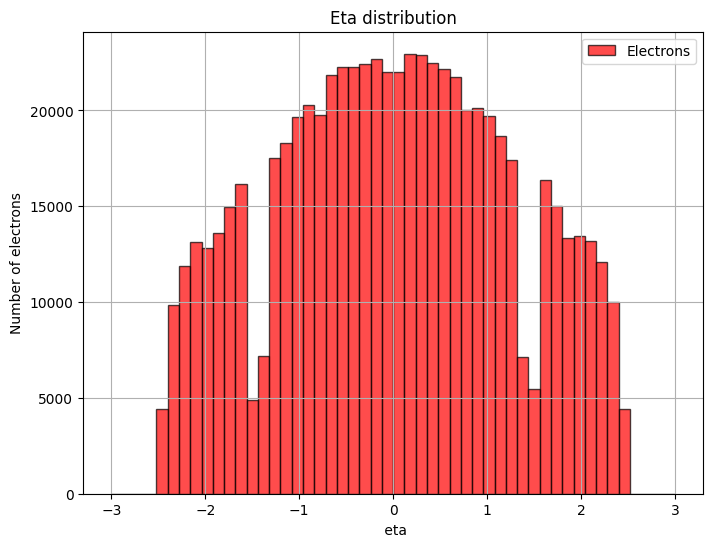

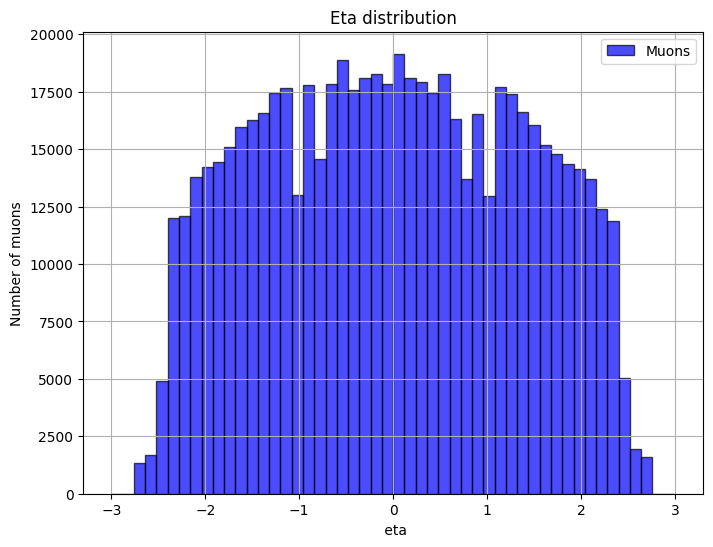

In [25]:
# Plot both distributions
plt.figure(figsize=(8,6))
plt.hist(electron_eta, bins=50, range=(-3, 3), alpha=0.7, color='red', edgecolor='black', label='Electrons')
# plt.hist(muon_eta, bins=50, range=(-3, 3), alpha=0.7, color='blue', edgecolor='black', label='Muons')

plt.xlabel(r" eta")
plt.ylabel("Number of electrons")
plt.title("Eta distribution")
plt.legend()
plt.grid()
plt.show()

# Plot both distributions
plt.figure(figsize=(8,6))
# plt.hist(electron_eta, bins=50, range=(-3, 3), alpha=0.7, color='red', edgecolor='black', label='Electrons')
plt.hist(muon_eta, bins=50, range=(-3, 3), alpha=0.7, color='blue', edgecolor='black', label='Muons')

plt.xlabel(r" eta")
plt.ylabel("Number of muons")
plt.title("Eta distribution")
plt.legend()
plt.grid()
plt.show()


### Задание: 

1. Посмотрите на распределение тау-лептонов, и любые другие объекты, которые вам кажутся интересными
2. Сейчас вы работаетe с Data_A, попробуйте посмотреть на MC данные, подумайте, почему результаты отличаются (https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC/mc_361106.Zee.exactly2lep.root, https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC/mc_361107.Zmumu.exactly2lep.root)

In [26]:
filename = 'mc_301215.ZPrime2000_ee.exactly2lep.root'
url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC/'+filename
urllib.request.urlretrieve(url, filename)
file = uproot.open(filename)

In [27]:
# Проверяем наличие дерева
tree_name = "mini"  # Имя дерева
if tree_name in file:
    tree = file[tree_name]
    print("List of branches:")
    print(tree.keys())
else:
    print("Error: TTree is not found!")

List of branches:
['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER', 'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav', 'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched', 'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20', 'photon_convType', 'tau_n', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_E', 'tau_isTightID', 'tau_truthMatched', 'tau_trigMatched', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst', 'met_et_syst',

In [28]:
# Определяем бранчи, относящиеся к лептонам
lep_branches = ['lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 
                'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 
                'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased']

# Читаем данные в Pandas DataFrame
df_leptons = tree.arrays(lep_branches)  # Используем Pandas

[11 11 11 ... 11 11 11]


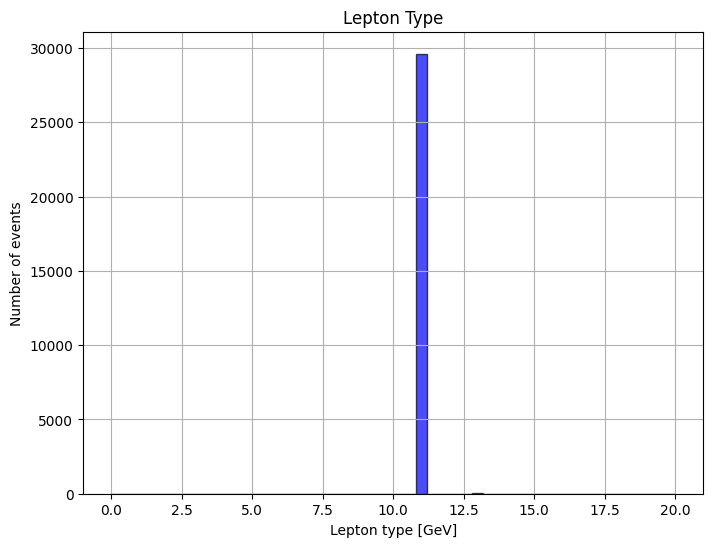

In [29]:
plot_distribution(df_leptons, 'lep_type', bins=50, range=(0, 20), xlabel="Lepton type [GeV]", title="Lepton Type")

[1019632.56  976556.94  957162.7  ...  777393.2   704014.56  695208.75]


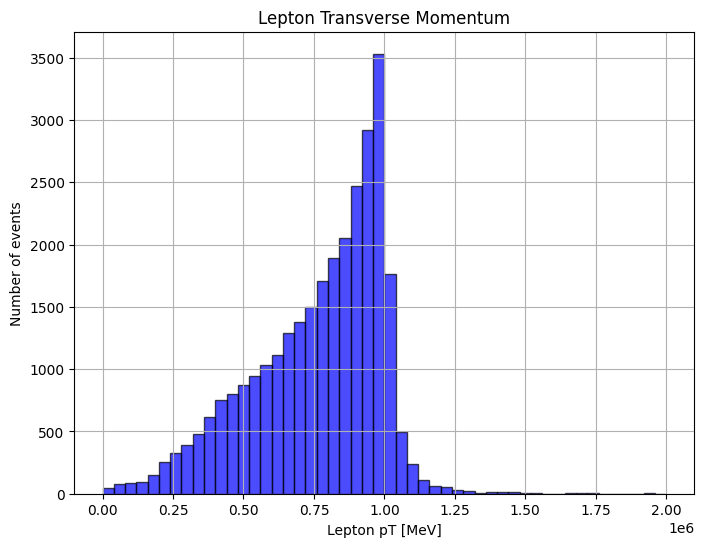

In [30]:
plot_distribution(df_leptons, 'lep_pt', bins=50, range=(0, 2000000), xlabel="Lepton pT [MeV]", title="Lepton Transverse Momentum")

[ 0.18367513 -0.10003489  0.20671718 ... -0.5539858   0.58029747
 -1.2010226 ]


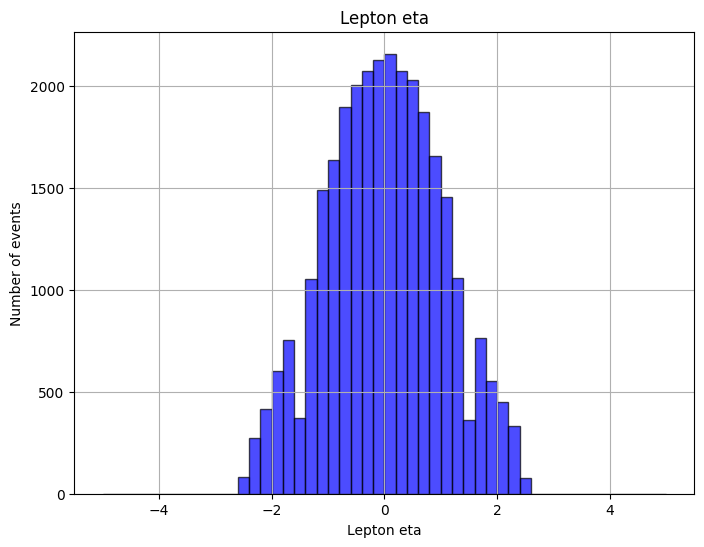

In [31]:
plot_distribution(df_leptons, 'lep_eta', bins=50, range=(-5, 5), xlabel="Lepton eta", title="Lepton eta")

[-1.3133041   1.8855628   1.3069671  ... -0.71567255  2.3233986
 -0.72950315]


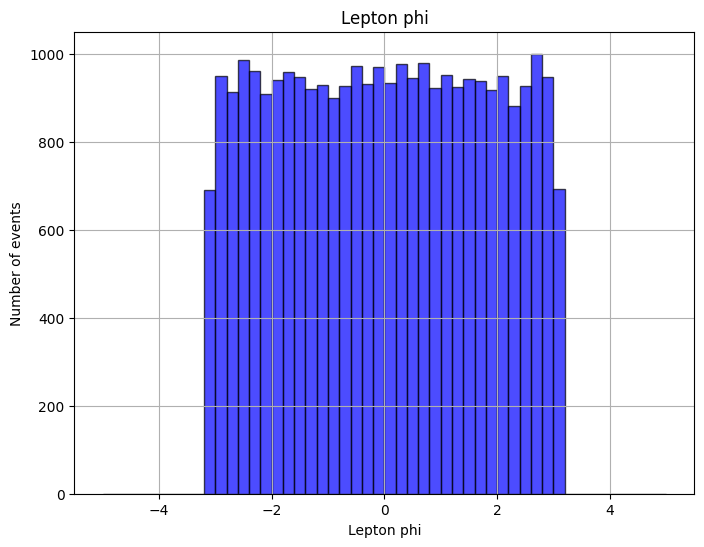

In [32]:
plot_distribution(df_leptons, 'lep_phi', bins=50, range=(-5, 5), xlabel="Lepton phi", title="Lepton phi")

In [33]:
filename = 'mc_364133.Ztautau_PTV70_140_BFilter.exactly2lep.root'
url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC/'+filename
urllib.request.urlretrieve(url, filename)
file = uproot.open(filename)

In [34]:
tau_branches = [
    'tau_n', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_E',
    'tau_isTightID', 'tau_truthMatched', 'tau_trigMatched',
    'tau_nTracks', 'tau_BDTid', 'tau_pt_syst', 'tau_charge'
]

In [35]:
df_tau = tree.arrays(tau_branches)

In [36]:
# Проверяем наличие дерева
tree_name = "mini"  # Имя дерева
if tree_name in file:
    tree = file[tree_name]
    print("List of branches:")
    print(tree.keys())
else:
    print("Error: TTree is not found!")

List of branches:
['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER', 'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav', 'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched', 'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20', 'photon_convType', 'tau_n', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_E', 'tau_isTightID', 'tau_truthMatched', 'tau_trigMatched', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst', 'met_et_syst',

[]


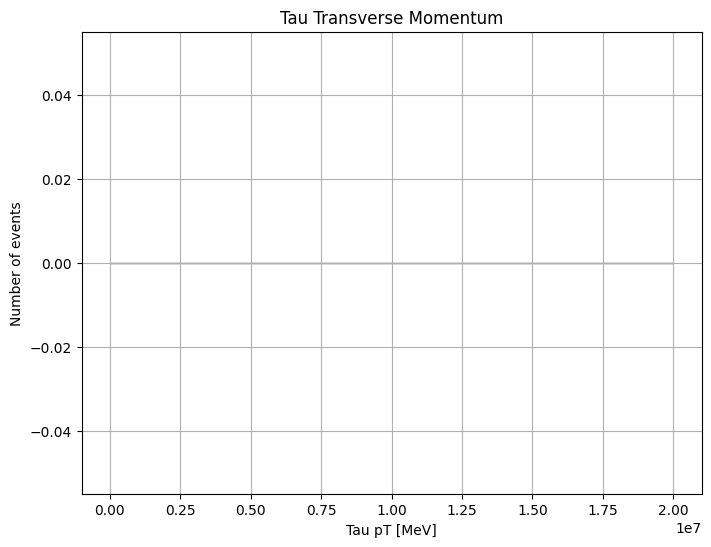

In [37]:
plot_distribution(df_tau, 'tau_pt', bins=50, range=(0, 20000000), xlabel="Tau pT [MeV]", title="Tau Transverse Momentum")

## Поиск Z бозона

**Частицы-переносчики слабых взаимодействий** – это заряженные W⁺, W⁻ и нейтральный Z. Рассмотрим подробнее, как распадается частица Z после её образования.

## Распад бозонов Z

- **Нейтральность Z:**  
  - Так как бозон Z нейтрален, сумма зарядов его продуктов распада должна равняться 0 (сохранение заряда).  
  - Это означает, что Z должен распадаться на пару: частица – античастица.  
  - 100%-ная вероятность распада распределяется между различными группами частиц согласно законам сохранения.

- **10% распадов Z:**  
  - В 10% случаев распада Z образуются пары заряженных лептонов: электрон-позитрон, мюон-антимюон и тау-антитау.  
  - Каждый из этих трёх вариантов примерно равновероятен.

- **20% распадов Z:**  
  - В 20% случаев Z распадается на пару нейтрино – антинейтрино.  
  - Нейтрино почти не взаимодействуют (не имеют электрического заряда) и остаются невидимыми в детекторе.  
  - Их присутствие определяется по отсутствию энергии или поперечного импульса после столкновения (так как энергия и импульс сохраняются).

- **70% распадов Z:**  
  - В 70% случаев происходит распад на пару кварк – антикварк, который в детекторе проявляется как каскады частиц, называемые «джетами».  
  - Кварки обладают свойством «цвета», и каждый кварк существует в одном из трёх цветов.  
  - При наличии 6 типов кварков (up, down, charm, strange, top, bottom) каждый с 3 цветами, получается 18 вариантов распада.

**Итого:** существует 24 варианта распада, но видимыми являются только 21.  
Мы сосредоточимся на двух режимах распада, наиболее простых для обнаружения: распад в электрон-позитронную и мюон-антимюонную пару.


<CENTER><img src="Zee_feynman.png" style="width:50%"></CENTER>

### Расчёт инвариантной массы двух лептонов

В данной ячейке мы рассчитываем инвариантную массу родительской частицы, которая распадается на два лептона. Пусть у нас есть массивы:

- **lep_E**: энергии лептонов, где `lep_E[0]` и `lep_E[1]` — энергии первого и второго лептона соответственно;
- **lep_px**, **lep_py**, **lep_pz**: соответствующие компоненты импульса для каждого лептона.

Инвариантная масса \( M \) вычисляется по формуле (в естественных единицах, где \( c = 1 \):

$$
M^2 = E_{\text{total}}^2 - |\vec{p}|^2,
$$



In [38]:
# Теория расчёта импульса и инвариантной массы:
#
# Импульс частицы – это вектор, характеризующий её движение, имеющий компоненты (px, py, pz).
# При использовании координат, где измеряется поперечный импульс (pT), псевдосбыстрота (η) и азимутальный угол (φ),
# компоненты импульса вычисляются по формулам:
#
#   px = pT * cos(φ)
#   py = pT * sin(φ)
#   pz = pT * sinh(η)
#
# Суммарный импульс двух лептонов определяется как векторная сумма их компонент:
#
#   p_total = (px_0 + px_1, py_0 + py_1, pz_0 + pz_1)
#
# Модуль этого суммарного вектора равен:
#
#   |p_total| = sqrt((px_0 + px_1)^2 + (py_0 + py_1)^2 + (pz_0 + pz_1)^2)
#
# Инвариантная масса системы двух частиц вычисляется по специальному соотношению,
# которое является следствием сохранения энергии и импульса в релятивистском механизме:
#
#   M^2 = E_total^2 - |p_total|^2
#
# Здесь E_total – суммарная энергия двух лептонов.
# Эта формула гарантирует, что инвариантная масса является одним и тем же числом во всех системах отсчёта.
#
# Благодаря этим вычислениям мы можем определить массу родительской частицы, распадающейся на два лептона,
# что является важной характеристикой для идентификации частиц в экспериментальной физике.


def calc_mll(lep_pt,lep_eta,lep_phi,lep_E): # lepton pt,eta,phi,energy
    
    # Суммарная энергия двух лептонов
    sumE = 0
    
    # Вычисляем компоненты импульса для каждого лептона
    # x-компонента: px = pT * cos(φ)
    px_0 = 0
    px_1 = 0
    
    # y-компонента: py = pT * sin(φ)
    py_0 = 0
    py_1 = 0
    
    # z-компонента: pz = pT * sinh(η)
    pz_0 = 0
    pz_1 = 0
    
    # Суммарные компоненты импульса двух лептонов
    sumpx = 0
    sumpy = 0
    sumpz = 0
    
    # Модуль суммарного импульса: |p_total| = sqrt( sumpx^2 + sumpy^2 + sumpz^2 )
    sump = 0
    
    # Инвариантная масса вычисляется по формуле: M^2 = E_total^2 - |p_total|^2
    Mll = 0
    
    # Возвращаем массу, переведённую из МэВ в ГэВ (делим на 1000)
    return Mll / 1000.0

In [39]:
import uproot3

/lhome/ific/m/mdidenko/miniconda3/envs/py3/lib/python3.10/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):


In [40]:
filename = 'data_D.exactly2lep.root'
url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/Data/'+filename
urllib.request.urlretrieve(url, filename)
file = uproot.open(filename)

In [41]:
# filename = 'mc_301215.ZPrime2000_ee.exactly2lep.root'
# url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC/'+filename
# urllib.request.urlretrieve(url, filename)
# file = uproot.open(filename)

In [42]:
data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
tree = uproot3.open(filename)["mini"] # open the tree called mini
numevents = uproot3.numentries(filename, "mini") # number of events

for data in tree.iterate(['lep_pt','lep_eta','lep_phi','lep_E'], 
                         outputtype=pd.DataFrame, # choose output type as pandas DataFrame
                         entrystop=numevents*0.01): # stop after fraction of events we want to process

    # calculation of 2-lepton invariant mass                                                                                                                                      
    data['mll'] = np.vectorize(calc_mll)(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E)

    data_all = pd.concat([data_all, data], ignore_index=True) # append dataframe from this batch to the dataframe for the whole sample


/tmp/mdidenko/ipykernel_1587220/3055219057.py:25: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


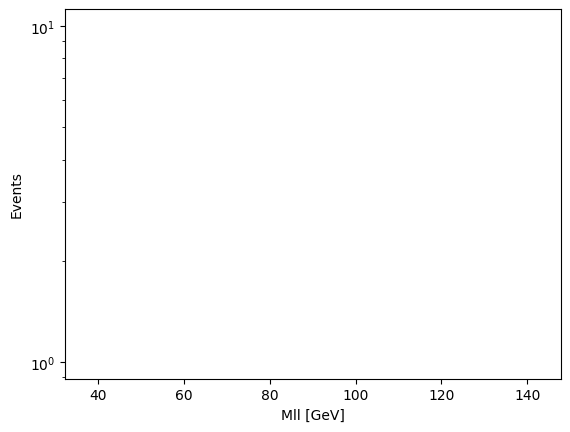

In [43]:
bin_edges = np.arange(start=35, # The interval includes this value
                      stop=150, # The interval doesn't include this value
                      step=5 ) # Spacing between values
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2 # central values of each bin

# histogram the data
data_x,_ = np.histogram(data_all['mll'], bins=bin_edges ) 

# statistical error on the data
data_x_errors = np.sqrt(data_x)

# plot the data points
plt.errorbar(x=bin_centres, 
                   y=data_x, 
                   yerr=data_x_errors,
                   fmt='ko' ) # 'k' means black and 'o' is for circles

# x-axis label
plt.xlabel('Mll [GeV]')

# y-axis label
plt.ylabel('Events')

# make the y-axis log scale
plt.yscale('log')

# Домашнее задание

**Цель:**  
Научиться рассчитывать инвариантную массу ди-лептонной системы, определять Лоренцев фактор и скорость электрона, а также анализировать распады бозона Z.

---

## Задание 1. Расчёт инвариантной массы ди-лептонной системы

В первом событии заданы следующие параметры (в MeV):

- **lep_px:**  
  - lep_px[0] = 32387  
  - lep_px[1] = -18772

- **lep_py:**  
  - lep_py[0] = 7047  
  - lep_py[1] = -9563

- **lep_pz:**  
  - lep_pz[0] = 144152  
  - lep_pz[1] = -2942

- **lep_E:**  
  - lep_E[0] = 147913  
  - lep_E[1] = 21272

Используя формулу

$$
M^2 = E_{\text{total}}^2 - |\vec{p}|^2,
$$



## Задание 2. Лоренцев фактор и скорость электрона

Предположим, что лептон с индексом 0 в первом событии является электроном.

1. Рассчитайте Лоренцев фактор по формуле

   $$
   \gamma = \frac{E}{m},
   $$

   где \( E \) — энергия электрона (используйте lep_E[0]), а \( m = 0.5 \) MeV — масса электрона.

2. Вычислите модуль импульса электрона (если заданы компоненты или через преобразование из $p_T$, $\eta$, $\phi$).

3. Найдите параметр

   $$
   \beta = \frac{|\vec{p}|}{E},
   $$

   и определите скорость электрона (при c = 1 , v = $\beta$).

---

## Задание 3. Написание функции для расчёта инвариантной массы

Напишите функцию с именем `calc_mll(lep_pt, lep_eta, lep_phi, lep_E)`, которая вычисляет инвариантную массу ди-лептонной системы.  
*Подсказка:*  
- Используйте формулу:  
  $$
  M^2 = E_{\text{total}}^2 - |\vec{p}|^2,
  $$
  
- Функция должна возвращать массу в ГэВ (если входные данные заданы в МэВ).

## Задание 4. Применение функции на реальных данных

Используйте данные из файла:
- `data_A.exactly2lep.root`

а также выполните анализ на объединённой выборке из файлов:
- `data_A.exactly2lep.root`
- `data_B.exactly2lep.root`
- `data_C.exactly2lep.root`
- `data_D.exactly2lep.root`

Выполните следующие шаги:

1. Постройте распределение инвариантной массы и определите положение пика.  
2. Оцените, соответствует ли полученное значение ожиданиям.

---

## Задание 5. Анализ MC выборок для различных распадов Z

Используйте данные моделирования (MC) с выборок https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC

Выберите и проанализируйте следующие файлы:
- Для $ Z \to \mu^+\mu^- $: например, `mc_364100.Zmumu_PTV0_70_CVetoBVeto.exactly2lep.root`, `mc_364101.Zmumu_PTV0_70_CFilterBVeto.exactly2lep.root`, `mc_364102.Zmumu_PTV0_70_BFilter.exactly2lep.root`

- Для $ Z \to e^+e^- $: например, `mc_364114.Zee_PTV0_70_CVetoBVeto.exactly2lep.root`, `mc_364115.Zee_PTV0_70_CFilterBVeto.exactly2lep.root`, `mc_364116.Zee_PTV0_70_BFilter.exactly2lep.root`

- Для $ Z \to \tau^+\tau^-$: например, `mc_364128.Ztautau_PTV0_70_CVetoBVeto.exactly2lep.root`, `mc_364129.Ztautau_PTV0_70_CFilterBVeto.exactly2lep.root`, `mc_364130.Ztautau_PTV0_70_BFilter.exactly2lep.root`

Для каждого набора данных:
1. Считайте данные и вычислите инвариантную массу ди-лептонной системы с помощью вашей функции `calc_mll`.
2. Постройте распределение инвариантной массы для выбранного распада.
3. Определите, где находится пик, и сравните его с ожидаемой массой бозона Z.
4. Сформулируйте, наблюдаются ли различия в распределениях для $Z \to \mu^+\mu^-$, $Z \to e^+e^-$ и $Z \to \tau^+\tau^-$, и если да, то почему.

